In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import cx_Oracle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dk_food_n_acc_1st_orders.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225604 entries, 0 to 225603
Data columns (total 27 columns):
SCM_N_ORDER_POS_NR              225604 non-null int64
SCM_N_ORDER_NR                  225604 non-null int64
TDT_T_KEY_ORDER_DATE            225604 non-null object
THR_C_KEY_ORDER_HOUR            225604 non-null object
SIT_N_KEY_SITE                  225604 non-null int64
CUS_N_KEY_CUSTOMER              225604 non-null int64
SCM_SALES_BMF                   225604 non-null object
SCM_SALES_CANCEL_BMF            225604 non-null object
SCM_D_FINANCE_CM1               225604 non-null object
SCM_D_FINANCE_CM2               225604 non-null object
SCM_D_ORIG_FINANCE_ORDER_NET    225604 non-null object
SCM_AP_ID                       225604 non-null int64
SCM_AS_ID                       225604 non-null int64
SCM_MASTER_AP_ID                225604 non-null int64
SCM_IS_ZSP_ORDER                225604 non-null int64
SCM_C_ORDER_STATUS              225604 non-null object
CTP_N_KEY_CUSTOME

In [4]:
data['ORDER_DATETIME'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'] + ' ' + data['THR_C_KEY_ORDER_HOUR'] + ':00', 
                                        format="%d/%m/%y %H:%M:%S")

In [5]:
data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [6]:
lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
data['SCM_SALES_BMF'] = lista

In [7]:
lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0

In [8]:
lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
data['SCM_SALES_CANCEL_BMF'] = lista1

In [9]:
lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
data['SCM_D_FINANCE_CM1'] = lista2

In [10]:
lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
data['SCM_D_FINANCE_CM2'] = lista3

In [11]:
data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')

In [12]:
data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100

In [13]:
data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 100

In [14]:
# let's convert inf and -inf into NA so that they are excluded when calculating the mean
data['REL_CM2'] = data['REL_CM2'].replace(np.inf, np.nan).replace(-np.inf, np.nan)

In [15]:
#Convert date to calendar week number and month number
data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

Let's get PG3 & PG4 short_link names from our DB to make data more readable...

In [16]:
pg3_l = list(data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique())

In [17]:
pg3_list = repr(pg3_l).replace('[','(').replace(']',')')

In [18]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg3_list

In [19]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg3 = pd.read_sql(query, con = conn)
conn.close()

In [20]:
pg3['PG_SHORTLINK_ID'] = pg3['PG_SHORTLINK'] + '_' + pg3['PG_ID'].astype(str)

In [21]:
len(set(pg3['PG_ID'])), len(set(pg3['PG_SHORTLINK_ID']))

(55, 55)

In [22]:
pg3

,PG_ID,PG_SHORTLINK,PG_SHORTLINK_ID
0,9,hundebett,hundebett_9
1,15,hundeleine_hundehalsband,hundeleine_hundehalsband_15
2,16,fressnapf,fressnapf_16
3,18,hundesnacks,hundesnacks_18
4,20,hundespielzeug,hundespielzeug_20
5,23,kratzbaum_katzenbaum,kratzbaum_katzenbaum_23
6,29,katzentoilette,katzentoilette_29
7,33,fressnapf,fressnapf_33
8,34,katzensnacks,katzensnacks_34
9,36,katzenspielzeug,katzenspielzeug_36


In [23]:
pg3_dict = {key: value for (key, value) in zip(pg3['PG_ID'], pg3['PG_SHORTLINK_ID'])}

In [24]:
pg3_dict[0] = 'null'

In [25]:
lista_pg3 = [pg3_dict[i] for i in data['OSP_3_LEAD_P_PG_ID'].fillna(0)]

In [26]:
len(lista_pg3), len(data['OSP_3_LEAD_P_PG_ID'])

(225604, 225604)

In [27]:
data['LEAD_PG3_NAME'] = lista_pg3

In [28]:
pg4_l = list(data['OSP_4_LEAD_P_PG_ID'].fillna(0).unique())

In [29]:
pg4_list = repr(pg4_l).replace('[','(').replace(']',')')

In [30]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg4_list

In [31]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg4 = pd.read_sql(query, con = conn)
conn.close()

In [32]:
pg4_dict = {key: value for (key, value) in zip(pg4['PG_ID'], pg4['PG_SHORTLINK'])}

In [33]:
pg4_dict[-1] = 'null'

In [34]:
lista_pg4 = [pg4_dict[i] for i in data['OSP_4_LEAD_P_PG_ID'].fillna(-1)]

In [35]:
len(lista_pg4), len(data['OSP_4_LEAD_P_PG_ID'])

(225604, 225604)

In [36]:
data['LEAD_PG4_NAME'] = lista_pg4

In [37]:
data[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME']].sample(5)

,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME
167154,9,hundebett_9,75,hundekissen
89875,47,spielzeug_47,910,zwergkaninchen
1809,251,hundefutter_trockenfutter_251,311,pedigree
225301,251,hundefutter_trockenfutter_251,81396,royal_canin_veterinary_diet
71079,23,kratzbaum_katzenbaum_23,49727,kratztonne


In [38]:
first_orders = data[data['OSP_KO_COUNT_NET'] == 1]

In [39]:
cus_pg3_1st = {}

for i in first_orders['CUS_N_KEY_CUSTOMER'].unique():
    cus_data = first_orders[first_orders['CUS_N_KEY_CUSTOMER'] == i]
    cus_pg3_1st[i] = cus_data['LEAD_PG3_NAME'].iloc[0]

In [40]:
cus_pg3_1st

{16972169: 'hundesnacks_18',
 16970055: 'katzenfutter_trockenfutter_252',
 16971634: 'hundehuette_hundetuer_2192',
 16970191: 'hundespielzeug_20',
 16974926: 'hundesnacks_18',
 16969461: 'kratzbaum_katzenbaum_23',
 16970141: 'hundepflege_409',
 16975548: 'freigehege_49828',
 16971484: 'futter_45',
 16974729: 'heu_streu_305',
 16970797: 'katzenfutter_trockenfutter_252',
 16975533: 'balkon_garten_2155',
 16977106: 'katzenstreu_301',
 16972064: 'sport_training_153317',
 16972096: 'hundefutter_trockenfutter_251',
 16968744: 'hundeleine_hundehalsband_15',
 16969910: 'hundefutter_trockenfutter_251',
 16971837: 'katzenfutter_dose_2068',
 16974212: 'katzenfutter_trockenfutter_252',
 16968980: 'hundefutter_trockenfutter_251',
 16972306: 'balkon_garten_2155',
 16975033: 'katzenfutter_trockenfutter_252',
 16973993: 'hundefutter_trockenfutter_251',
 16975840: 'hundefutter_trockenfutter_251',
 16975048: 'futter_45',
 16990608: 'katzenfutter_trockenfutter_252',
 17067035: 'hundefutter_trockenfutter_

In [41]:
cus_pg3_1st_list = [cus_pg3_1st[i] for i in data['CUS_N_KEY_CUSTOMER'].values]

In [42]:
len(data['CUS_N_KEY_CUSTOMER']) == len(cus_pg3_1st_list)

True

In [43]:
data['LEAD_PG3_1ST_ORD'] = cus_pg3_1st_list

In [44]:
cm2_pg3_to_pg4 = data.groupby(['SCM_N_ORDER_NR', 'TDT_T_KEY_ORDER_DATE', 'CUS_N_KEY_CUSTOMER', 
                                   'OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 
                                   'LEAD_PG3_1ST_ORD'], as_index=False).agg({'SCM_D_FINANCE_CM2': 'sum',
                                                                        'OSP_KO_COUNT_NET': 'mean',
                                                                            'REL_CM2': 'sum',
                                                                            'SCM_D_ORIG_FINANCE_ORDER_NET':'sum'})

In [45]:
cm2_pg3_to_pg4.sample(10)

,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,CUS_N_KEY_CUSTOMER,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,LEAD_PG3_1ST_ORD,SCM_D_FINANCE_CM2,OSP_KO_COUNT_NET,REL_CM2,SCM_D_ORIG_FINANCE_ORDER_NET
14987,93464598,2017-08-30,17286255,252,katzenfutter_trockenfutter_252,81397,royal_canin_veterinary_diet,katzenfutter_trockenfutter_252,5.3540,2,16.598256,32.2564
7273,91082465,2017-07-20,17378416,252,katzenfutter_trockenfutter_252,683,royal_canin,katzenfutter_trockenfutter_252,-0.0225,1,-0.056543,39.7924
22382,95628809,2017-10-03,18104353,251,hundefutter_trockenfutter_251,255,eukanuba,hundefutter_trockenfutter_251,8.9883,1,20.911193,42.9832
16477,93878764,2017-09-06,17830470,251,hundefutter_trockenfutter_251,2044,bosch,hundefutter_trockenfutter_251,8.6791,1,18.688725,46.4403
49880,104291899,2018-02-08,18121335,252,katzenfutter_trockenfutter_252,261925,royal_canin_breed_cat,katzenfutter_trockenfutter_252,7.2596,5,5.444918,133.3280
44233,101450393,2017-12-29,18279606,42,kaefigzubehoer_42,2275,bruecken_treppen,hundetransportbox_2190,1.7703,5,10.491164,16.8742
28449,97383845,2017-10-30,18157074,252,katzenfutter_trockenfutter_252,683,royal_canin,katzenfutter_trockenfutter_252,5.7641,1,7.151223,80.6030
48027,103356799,2018-01-26,18750663,49828,freigehege_49828,49829,metall,hundetransportbox_2190,11.1926,3,28.951670,38.6596
54551,107487160,2018-03-27,18823054,18,hundesnacks_18,1441,kaustreifen,hundeleine_hundehalsband_15,1.5170,3,7.105220,21.3505
5750,90520478,2017-07-11,17289620,251,hundefutter_trockenfutter_251,17798,royal_canin_breed,hundefutter_trockenfutter_251,4.4099,1,7.076356,62.3188


In [46]:
cm2_pg3_to_pg4['LEAD_PG3_1ST_ORD'].unique()

array(['hundefutter_trockenfutter_251', 'kratzbaum_katzenbaum_23',
       'hundetransportbox_2190', 'hundeleine_hundehalsband_15',
       'barf_183134', 'futter_45', 'katzenfutter_trockenfutter_252',
       'freigehege_49828', 'katzenstreu_301', 'ungezieferschutz_207553',
       'katzentoilette_29', 'heu_streu_305', 'katzenspielzeug_36',
       'hundespielzeug_20', 'hundepflege_409', 'balkon_garten_2155',
       'katzenbetten_katzenkissen_1540', 'katzenfutter_dose_2068',
       'spielzeug_47', 'sport_training_153317',
       'hundefutter_ergaenzung_1400', 'katzensnacks_34', 'fressnapf_33',
       'hundehuette_hundetuer_2192', 'hundesnacks_18', 'hundebett_9',
       'transport_37', 'hundefutter_nassfutter_857', 'fressnapf_16',
       'hundebekleidung_hundemantel_40023', 'futter_ergaenzung_401',
       'superbox_dog_255413', 'spielzeug_1603',
       'katzenfutter_ergaenzung_38'], dtype=object)

In [47]:
crosstab_ko_count_net = pd.crosstab(cm2_pg3_to_pg4['LEAD_PG3_1ST_ORD'], cm2_pg3_to_pg4['OSP_KO_COUNT_NET'], 
                                           values = cm2_pg3_to_pg4['SCM_N_ORDER_NR'],
                                          aggfunc='count').fillna(0).astype(int)

In [48]:
crosstab_ko_count_net

OSP_KO_COUNT_NET,1,2,3,4,5
LEAD_PG3_1ST_ORD,,,,,
balkon_garten_2155,1092,209,107,61,43
barf_183134,56,34,21,14,9
freigehege_49828,797,224,110,59,39
fressnapf_16,260,65,30,17,8
fressnapf_33,452,123,66,36,21
futter_45,275,141,90,53,29
futter_ergaenzung_401,89,27,15,7,5
heu_streu_305,229,73,42,22,14
hundebekleidung_hundemantel_40023,354,89,38,16,9


In [49]:
cm2_pg3_to_pg4[cm2_pg3_to_pg4['CUS_N_KEY_CUSTOMER'] == 18764637]

,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,CUS_N_KEY_CUSTOMER,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,LEAD_PG3_1ST_ORD,SCM_D_FINANCE_CM2,OSP_KO_COUNT_NET,REL_CM2,SCM_D_ORIG_FINANCE_ORDER_NET


In [50]:
next_orders = cm2_pg3_to_pg4[cm2_pg3_to_pg4['OSP_KO_COUNT_NET'] != 1]

In [51]:
crosstab_pg3_to_pg4_orders = pd.crosstab(next_orders['LEAD_PG3_1ST_ORD'], next_orders['LEAD_PG4_NAME'], 
                                           values = next_orders['SCM_N_ORDER_NR'],
                                          aggfunc='count').fillna(0).astype(int).apply(lambda x: x/x.sum() * 100, axis=1).round(2)

In [52]:
crosstab_pg3_to_pg4_orders

LEAD_PG4_NAME,_lampen,acana,adult,affinity_advance,affinity_advance_veterinary_diets,affinity_ultima,agility,algenbekaempfung,almo_nature,almo_nature_holistic,...,worlds_best_cat_litter,wuerste_fleischbaellchen,yarrah,zahngesundheit,zahnpflege,zahnpflege_snacks,zoolove,zooplus_bio,zooplus_classic,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
balkon_garten_2155,0.00,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.24,0.00,0.00,0.00,0.00,0.0,0.24
barf_183134,0.00,1.28,2.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
freigehege_49828,0.00,0.23,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.46,0.00,0.00,0.0,7.64
fressnapf_16,0.00,3.33,0.00,0.00,0.00,0.00,0.00,0.00,0.83,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
fressnapf_33,0.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
futter_45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,27.48
futter_ergaenzung_401,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5.56
heu_streu_305,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,7.95
hundebekleidung_hundemantel_40023,0.00,2.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.0,0.00


In [53]:
crosstab_pg3_to_pg4_orders.columns.ravel()

array(['_lampen', 'acana', 'adult', 'affinity_advance',
       'affinity_advance_veterinary_diets', 'affinity_ultima', 'agility',
       'algenbekaempfung', 'almo_nature', 'almo_nature_holistic',
       'alpha_spirit', 'animonda', 'animonda_rafine', 'antizug_maulkorb',
       'applaws', 'applaws_katzenfutter', 'applaws_natures_calling',
       'aquarien_komplett', 'aquarienkies', 'aquarium_aussenfilter',
       'aquarium_filter', 'aquarium_unterschrank', 'aquarium_zubehoer',
       'aufbau_leistung_zucht', 'augen_ohrenpflege', 'augenpflege',
       'aussergewoehnliche_katzenbetten', 'autoschondecken',
       'autoschutzgitter', 'bade_sand', 'badehaeuser', 'baelle',
       'baldrian_katzenspielzeug', 'beaphar_spezialdiaet', 'benek',
       'beschaeftigung', 'betten', 'biokats', 'biskuits_kekse', 'bosch',
       'bozita', 'bozita_robur', 'briantos', 'bruecken_treppen',
       'buersten', 'cat_and_clean', 'cat_chow', 'catessy',
       'catessy_snacks', 'catnip_spielzeug', 'cats_best', 'ca

In [54]:
pg4_selection = [i for i in crosstab_pg3_to_pg4_orders.columns if (crosstab_pg3_to_pg4_orders[i] > 5).any()]

In [55]:
len(pg4_selection)

60

In [56]:
np.array(pg4_selection)

array(['_lampen', 'bade_sand', 'badehaeuser', 'bosch',
       'cellulose_einstreu', 'einbautueren', 'eukanuba',
       'extreme_classic', 'felix', 'frostfleisch_mixpakete',
       'futterpflanzen', 'gefriergetrocknete_snacks', 'gelenke_knochen',
       'geschirre', 'grosssittich', 'hanfstreu', 'happy_cat',
       'haut_haare', 'heu', 'hills', 'hills_prescription_diet',
       'holzstreu', 'hundefutter_wolf_of_wilderness', 'hundemantel',
       'kaetzchenfutter', 'katzenklappe_und_einbautuer', 'katzentraenke',
       'kauknochen', 'kaurollen', 'kaustreifen',
       'knabberspass_und_knabberstangen', 'kolbenhirse', 'kong',
       'kratzbaum_gross', 'meerschweinchen', 'metall',
       'nester_grashaeuser', 'papagei', 'pasten_cremes', 'pedigree',
       'pellets', 'rind', 'royal_canin', 'royal_canin_breed',
       'royal_canin_breed_cat', 'royal_canin_katzenfutter',
       'royal_canin_size', 'royal_canin_veterinary_diet',
       'royal_canin_veterinary_diet_feline_nassfutter', 'schermasch

In [57]:
crosstab_pg3_to_pg4_orders[pg4_selection]

LEAD_PG4_NAME,_lampen,bade_sand,badehaeuser,bosch,cellulose_einstreu,einbautueren,eukanuba,extreme_classic,felix,frostfleisch_mixpakete,...,sheba,smilla,superbox_dog_xmas2017,tigerino,transport_und_sicherheit,transportboxen,vogelkaefig_papagei,whiskas_katzenfutter,zahnpflege_snacks,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
balkon_garten_2155,0.00,0.00,0.00,0.00,0.24,0.24,1.43,1.90,1.43,0.00,...,0.24,1.90,0.00,1.43,0.00,0.48,0.00,1.67,0.00,0.24
barf_183134,0.00,0.00,0.00,5.13,0.00,0.00,0.00,0.00,0.00,24.36,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
freigehege_49828,0.00,0.69,0.00,2.08,0.00,1.85,0.00,0.23,0.00,0.00,...,0.00,0.00,0.00,0.23,0.00,0.69,0.00,0.00,0.46,7.64
fressnapf_16,0.00,0.00,0.00,2.50,0.00,0.00,6.67,0.00,2.50,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fressnapf_33,0.00,0.00,0.00,0.41,1.22,0.00,0.00,2.03,0.00,0.00,...,0.41,1.63,0.00,1.22,0.00,0.00,0.00,0.41,0.00,0.00
futter_45,0.00,1.92,0.00,0.00,0.32,0.00,0.32,0.00,0.00,0.00,...,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,27.48
futter_ergaenzung_401,0.00,0.00,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,7.41,0.00,0.00,0.00,5.56
heu_streu_305,0.00,0.00,0.00,0.00,8.61,0.00,0.00,0.66,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,7.95
hundebekleidung_hundemantel_40023,0.00,0.00,0.00,3.29,0.00,0.66,1.32,0.00,0.00,0.00,...,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [58]:
crosstab_pg3_to_pg4_orders[pg4_selection].to_csv('dk_rel_orders_lead_pg3_and_pg4_selection.csv', sep=';', index=True, encoding='utf-8')

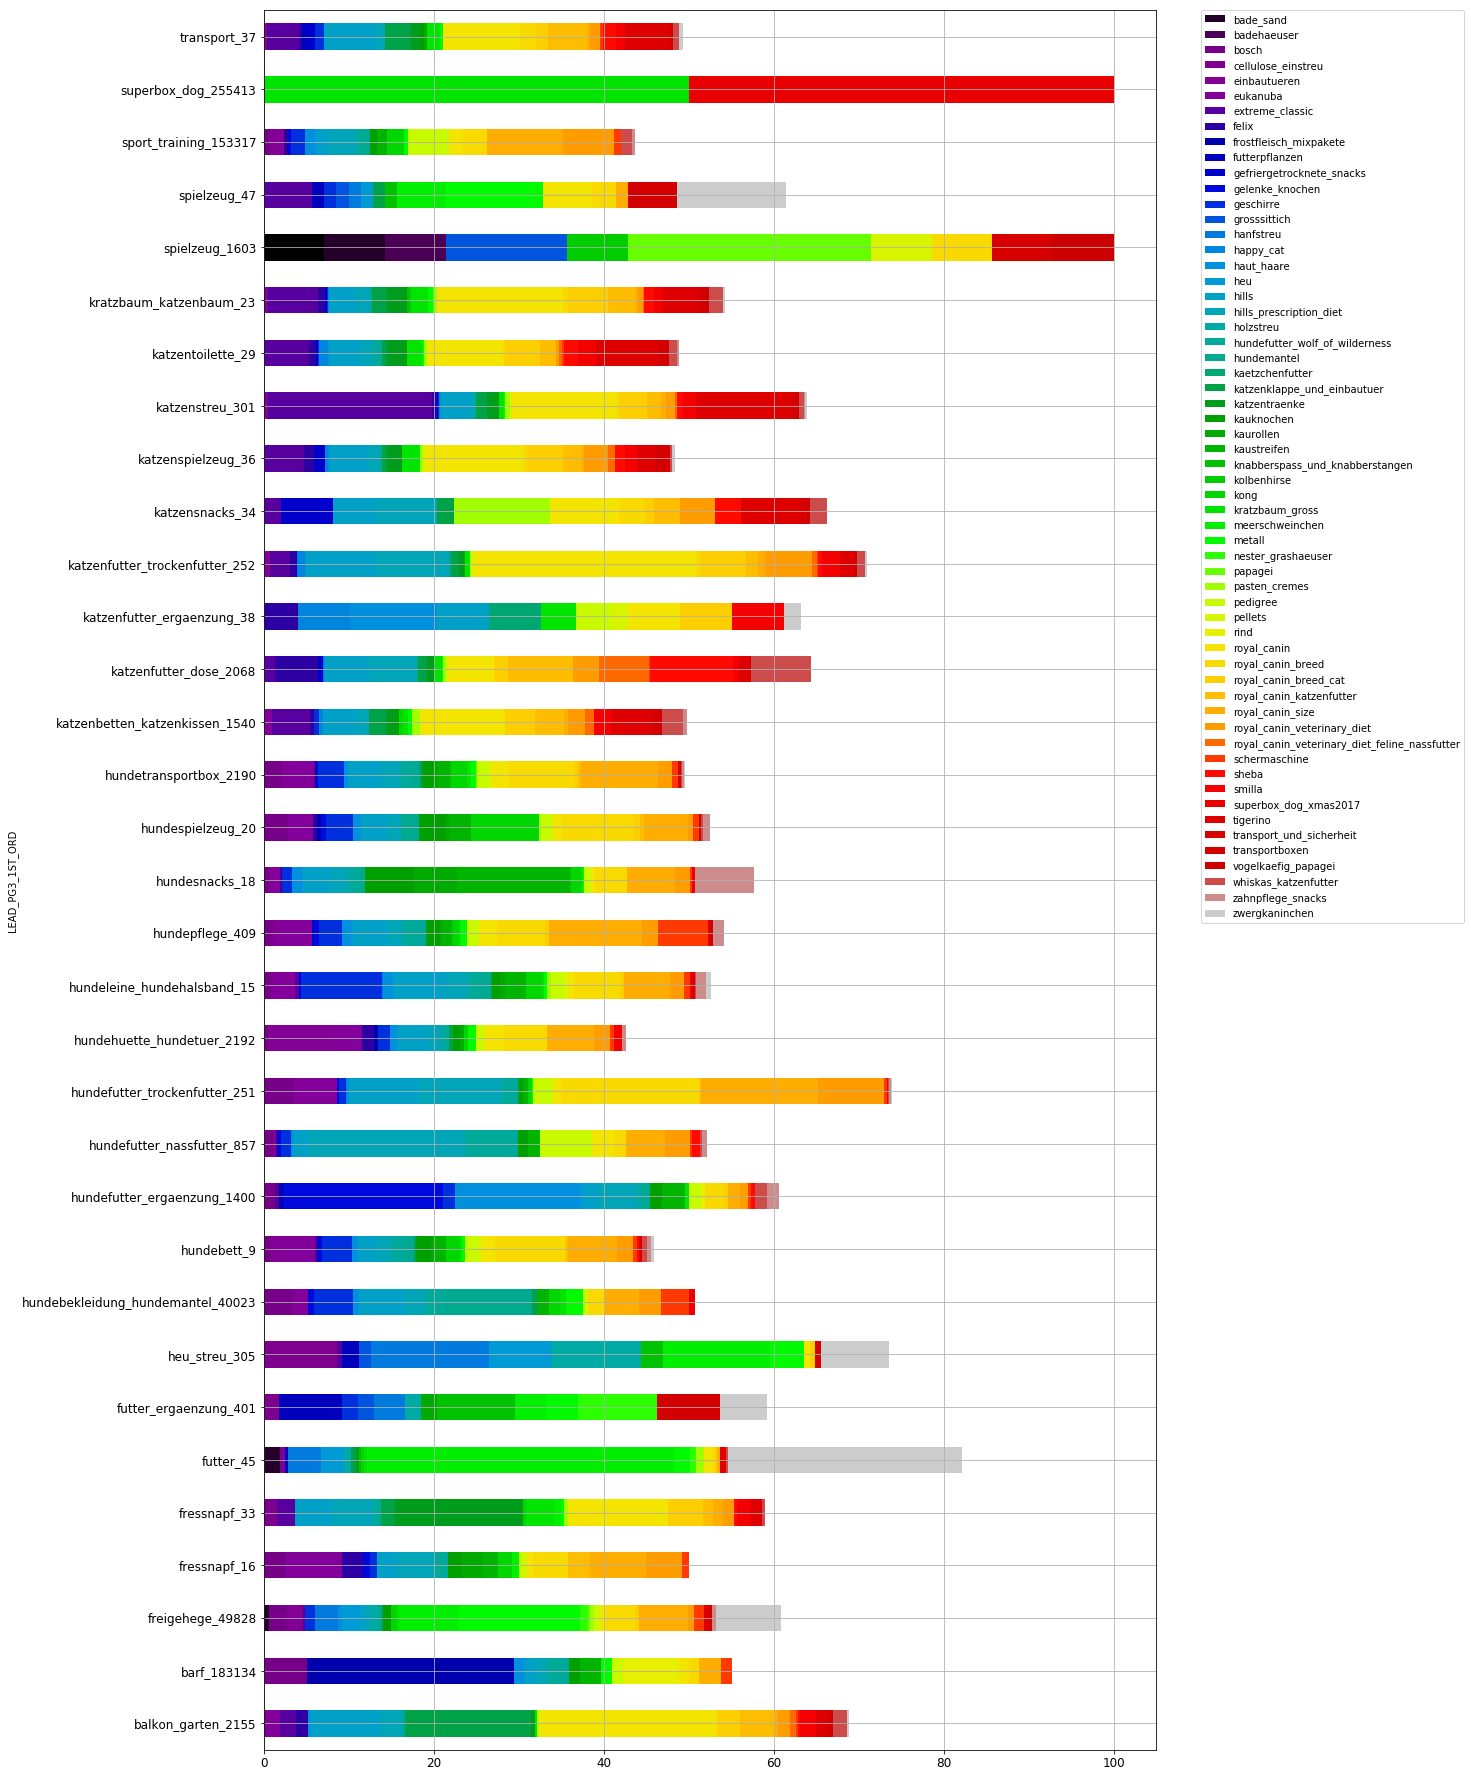

In [59]:
crosstab_pg3_to_pg4_orders[pg4_selection].plot(kind='barh', stacked=True, figsize=(16, 32), grid=True, fontsize=12, colormap='nipy_spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.tight_layout()
#plt.savefig('rel_orders_accesories_and_pg4_sel')

In [60]:
crosstab_pg3_to_pg4_cm2 = pd.crosstab(cm2_pg3_to_pg4['LEAD_PG3_1ST_ORD'], cm2_pg3_to_pg4['OSP_KO_COUNT_NET'], 
                                           values = cm2_pg3_to_pg4['SCM_D_FINANCE_CM2'],
                                          aggfunc='sum').fillna(0).round(2)

In [61]:
crosstab_pg3_to_pg4_cm2

OSP_KO_COUNT_NET,1,2,3,4,5
LEAD_PG3_1ST_ORD,,,,,
balkon_garten_2155,14609.73,1817.61,845.58,400.05,344.85
barf_183134,953.93,496.17,213.21,146.84,105.19
freigehege_49828,7923.16,2491.52,1606.18,703.01,393.79
fressnapf_16,2070.03,656.16,365.65,183.16,57.34
fressnapf_33,5524.44,1521.08,599.94,367.73,176.41
futter_45,1784.34,1169.13,791.76,581.88,267.38
futter_ergaenzung_401,467.37,306.41,182.31,61.67,54.11
heu_streu_305,2319.03,767.76,492.98,221.06,96.57
hundebekleidung_hundemantel_40023,3764.79,875.78,376.09,127.33,79.62


In [62]:
crosstab_pg3_to_pg4_perc_cm2 = pd.crosstab(next_orders['LEAD_PG3_1ST_ORD'], next_orders['LEAD_PG4_NAME'], 
                                           values = next_orders['SCM_D_FINANCE_CM2'],
                                          aggfunc='sum').fillna(0).astype(int).apply(lambda x: x/x.sum() * 100, axis=1).round(2)

In [63]:
crosstab_pg3_to_pg4_perc_cm2

LEAD_PG4_NAME,_lampen,acana,adult,affinity_advance,affinity_advance_veterinary_diets,affinity_ultima,agility,algenbekaempfung,almo_nature,almo_nature_holistic,...,worlds_best_cat_litter,wuerste_fleischbaellchen,yarrah,zahngesundheit,zahnpflege,zahnpflege_snacks,zoolove,zooplus_bio,zooplus_classic,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
balkon_garten_2155,0.00,-0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.30
barf_183134,0.00,1.80,2.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
freigehege_49828,0.00,0.14,1.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,6.44
fressnapf_16,0.00,8.37,0.00,0.00,0.00,0.00,0.00,0.00,0.73,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fressnapf_33,0.00,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
futter_45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.39
futter_ergaenzung_401,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.59
heu_streu_305,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.22
hundebekleidung_hundemantel_40023,0.00,4.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00


In [64]:
crosstab_pg3_to_pg4_perc_cm2.columns.ravel()

array(['_lampen', 'acana', 'adult', 'affinity_advance',
       'affinity_advance_veterinary_diets', 'affinity_ultima', 'agility',
       'algenbekaempfung', 'almo_nature', 'almo_nature_holistic',
       'alpha_spirit', 'animonda', 'animonda_rafine', 'antizug_maulkorb',
       'applaws', 'applaws_katzenfutter', 'applaws_natures_calling',
       'aquarien_komplett', 'aquarienkies', 'aquarium_aussenfilter',
       'aquarium_filter', 'aquarium_unterschrank', 'aquarium_zubehoer',
       'aufbau_leistung_zucht', 'augen_ohrenpflege', 'augenpflege',
       'aussergewoehnliche_katzenbetten', 'autoschondecken',
       'autoschutzgitter', 'bade_sand', 'badehaeuser', 'baelle',
       'baldrian_katzenspielzeug', 'beaphar_spezialdiaet', 'benek',
       'beschaeftigung', 'betten', 'biokats', 'biskuits_kekse', 'bosch',
       'bozita', 'bozita_robur', 'briantos', 'bruecken_treppen',
       'buersten', 'cat_and_clean', 'cat_chow', 'catessy',
       'catessy_snacks', 'catnip_spielzeug', 'cats_best', 'ca

In [65]:
pg4_cm2_selection = [i for i in crosstab_pg3_to_pg4_perc_cm2.columns if (crosstab_pg3_to_pg4_perc_cm2[i] > 5).any()]

In [66]:
len(pg4_cm2_selection)

65

In [67]:
crosstab_pg3_to_pg4_perc_cm2[pg4_cm2_selection]

LEAD_PG4_NAME,acana,badehaeuser,betten,cellulose_einstreu,concept_for_life_cat,edelstahl,einbautueren,eukanuba,exklusive_katzentoilette,frettchen,...,smilla,superbox_dog_xmas2017,taste_of_the_wild,tigerino,transportboxen,transportkaefige,verhalten_wohlfuehlen_katzen,vogelkaefig_papagei,winterausstattung,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
balkon_garten_2155,-0.06,0.00,0.86,0.45,2.64,0.00,0.45,1.01,0.74,0.00,...,2.20,0.00,0.00,1.40,0.36,0.36,0.27,0.00,0.00,0.30
barf_183134,1.80,0.00,1.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,6.04,0.00,0.00,0.00,0.00
freigehege_49828,0.14,0.00,1.85,0.00,0.00,0.37,2.20,0.00,0.00,1.05,...,0.00,0.00,0.56,0.33,0.45,0.08,0.00,0.00,0.62,6.44
fressnapf_16,8.37,0.00,0.00,0.00,0.00,9.34,0.00,6.34,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.30,0.00,0.00,0.00,0.00
fressnapf_33,0.19,0.00,0.65,1.67,0.00,0.00,0.00,0.00,0.61,0.00,...,2.25,0.00,0.49,0.53,0.00,0.00,0.15,0.00,0.00,0.00
futter_45,0.00,0.00,0.11,0.61,0.47,0.00,0.00,0.40,0.00,6.51,...,0.00,0.00,0.36,0.68,0.00,0.00,0.00,0.00,1.04,22.39
futter_ergaenzung_401,0.00,0.00,1.69,2.54,0.00,0.00,0.00,0.00,0.00,4.41,...,0.00,0.00,0.00,0.00,6.27,0.00,6.27,0.00,0.00,5.59
heu_streu_305,0.00,0.00,0.00,15.27,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,10.35,7.22
hundebekleidung_hundemantel_40023,4.44,0.00,0.70,0.00,0.00,0.00,0.92,1.27,0.00,0.00,...,0.00,0.00,2.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [68]:
crosstab_pg3_to_pg4_perc_cm2[pg4_cm2_selection].to_csv('dk_rel_cm2_lead_pg3_and_pg4_selection.csv', sep=';',
                                                      index=True, encoding='utf-8')

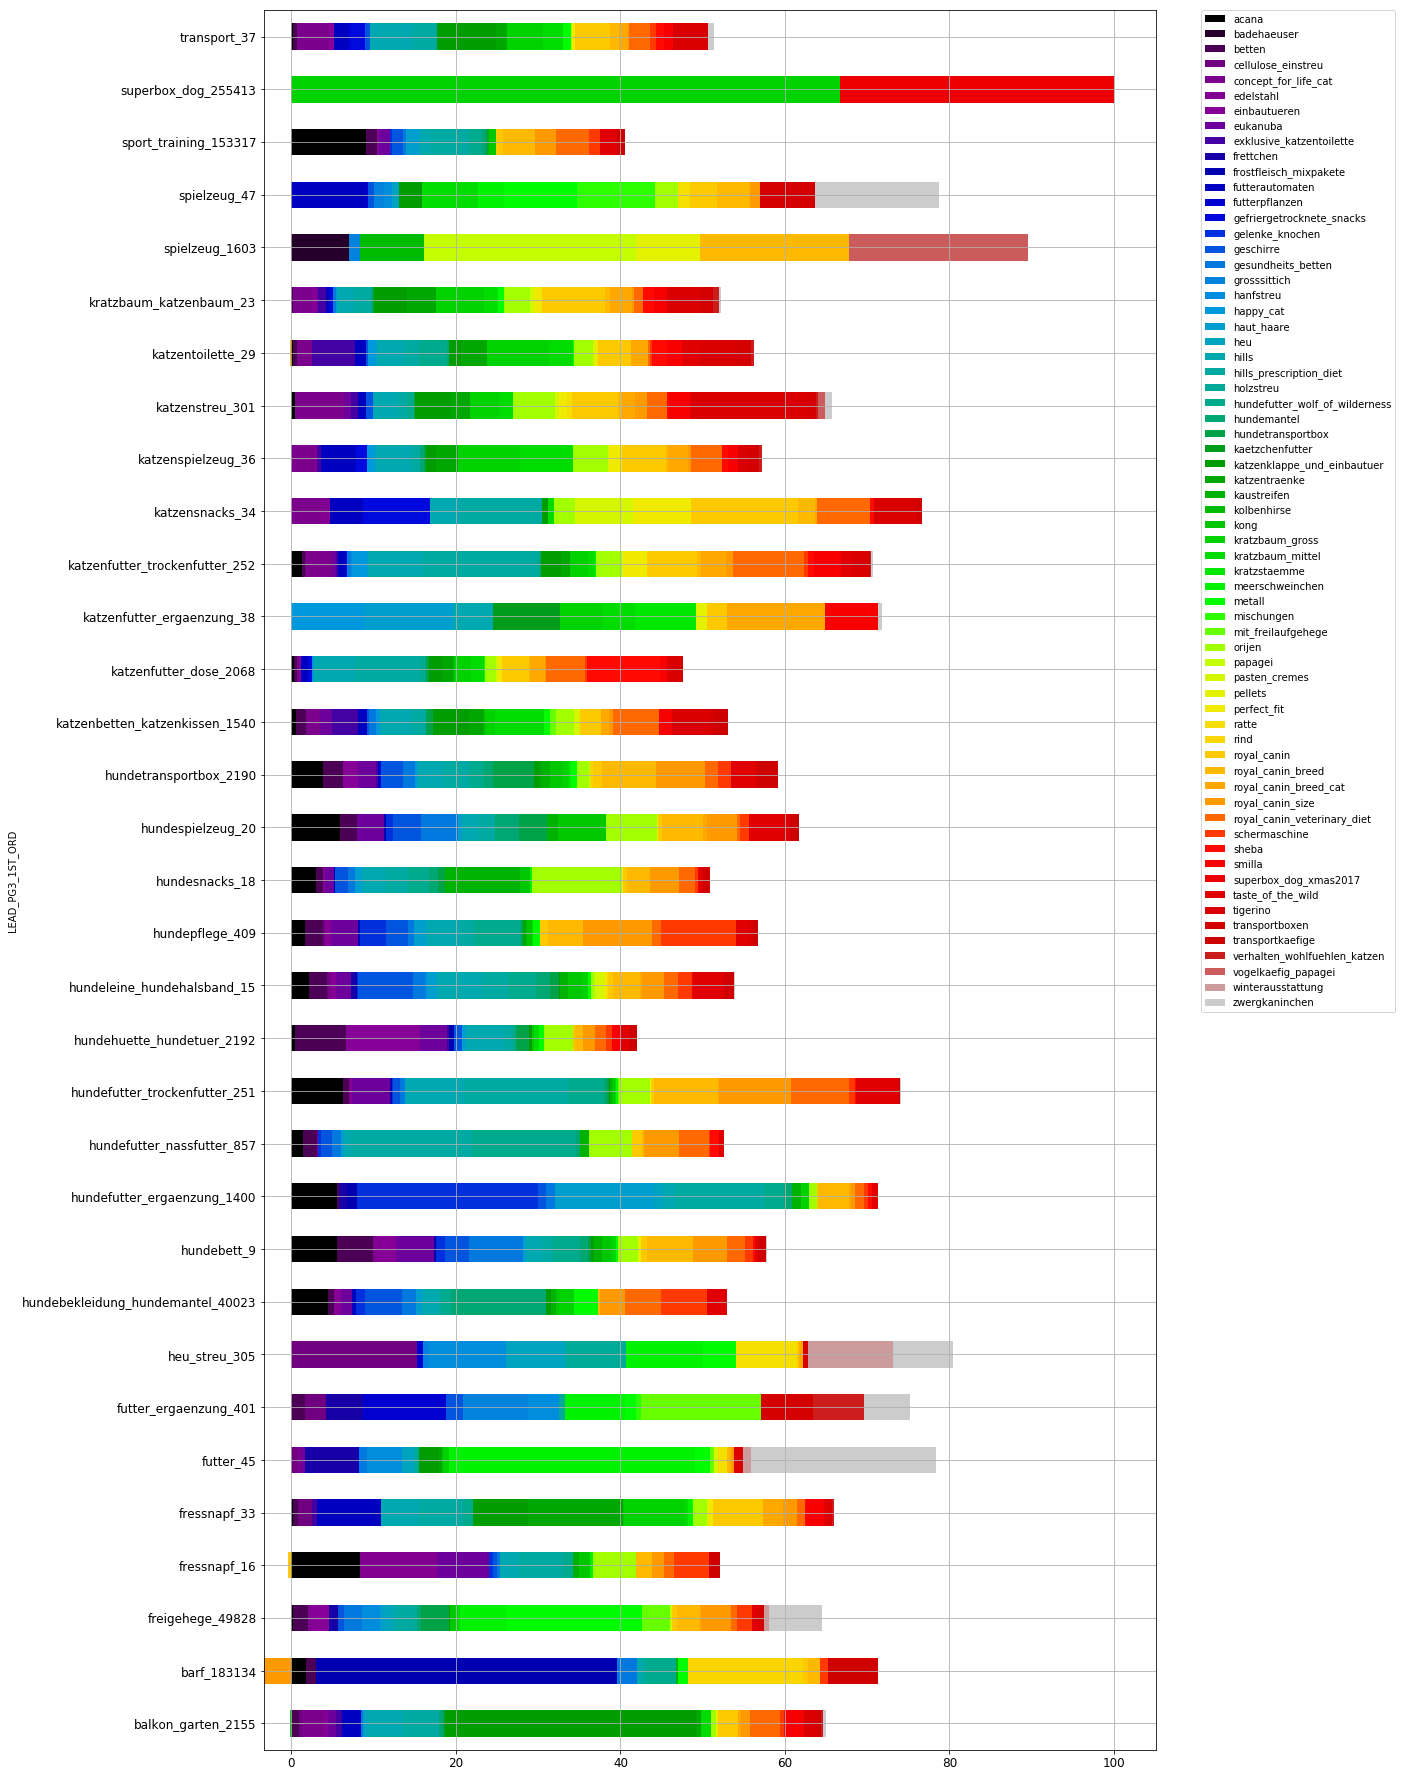

In [69]:
crosstab_pg3_to_pg4_perc_cm2[crosstab_pg3_to_pg4_perc_cm2.index != 'geschenkgutscheine_17947'][pg4_cm2_selection]\
.plot(kind='barh', stacked=True, figsize=(16, 32), grid=True, fontsize=12, colormap='nipy_spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [70]:
cm2_pg3_to_pg4.sample(10)

,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,CUS_N_KEY_CUSTOMER,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,LEAD_PG3_1ST_ORD,SCM_D_FINANCE_CM2,OSP_KO_COUNT_NET,REL_CM2,SCM_D_ORIG_FINANCE_ORDER_NET
56382,108800241,2018-04-16,17967170,251,hundefutter_trockenfutter_251,17798,royal_canin_breed,hundefutter_trockenfutter_251,-1.0835,4,-0.584481,185.3780
16464,93871975,2017-09-06,17829580,252,katzenfutter_trockenfutter_252,81397,royal_canin_veterinary_diet,katzenfutter_trockenfutter_252,11.9781,1,20.633042,58.0530
4971,90241497,2017-07-05,17244635,16,fressnapf_16,194176,alle_hundenaepfe,fressnapf_16,4.6337,1,19.686291,23.5377
389,88379041,2017-06-04,16989110,252,katzenfutter_trockenfutter_252,720,hills,katzenfutter_trockenfutter_252,-3.3628,1,-10.530106,31.9351
17280,94105754,2017-09-10,17868406,252,katzenfutter_trockenfutter_252,720,hills,katzenfutter_trockenfutter_252,3.7793,1,11.378430,33.2146
41916,100812759,2017-12-17,18873913,252,katzenfutter_trockenfutter_252,683,royal_canin,katzenfutter_trockenfutter_252,-3.4357,1,-9.096806,37.7682
19834,94914585,2017-09-22,17994765,2155,balkon_garten_2155,2157,katzenklappe_und_einbautuer,balkon_garten_2155,25.2330,1,19.006249,132.7616
45820,102046139,2018-01-08,18912022,29,katzentoilette_29,239,schaufeln_vorleger,katzenfutter_trockenfutter_252,4.6086,2,17.054424,27.0229
53849,106942335,2018-03-19,17987250,23,kratzbaum_katzenbaum_23,2061,kratzbaum_gross,kratzbaum_katzenbaum_23,18.7363,2,29.081260,64.4274
20831,95241020,2017-09-27,18044929,251,hundefutter_trockenfutter_251,17798,royal_canin_breed,hundefutter_trockenfutter_251,25.0247,1,19.857737,126.0199


In [71]:
cm2_pg3_to_pg4['REL_CM2'].describe()

count    6.131700e+04
mean    -3.900242e+02
std      1.005240e+05
min     -2.489200e+07
25%      8.419434e+00
50%      1.647594e+01
75%      2.395563e+01
max      8.256624e+01
Name: REL_CM2, dtype: float64

As we have some orders with net_sales = 0, CM2% becames extremely high or low and can lead us into trouble when calculating the CM2% on average per Lead PG4

In [72]:
cm2_pg3_to_pg4_subset = cm2_pg3_to_pg4[cm2_pg3_to_pg4['SCM_D_ORIG_FINANCE_ORDER_NET'] >= 1]

In [73]:
next_orders_subset = cm2_pg3_to_pg4_subset[cm2_pg3_to_pg4_subset['OSP_KO_COUNT_NET'] != 1]

In [74]:
pg3_orders_count_net_cm2 = pd.crosstab(cm2_pg3_to_pg4_subset['LEAD_PG3_1ST_ORD'], cm2_pg3_to_pg4_subset['OSP_KO_COUNT_NET'], 
                                           values = cm2_pg3_to_pg4_subset['REL_CM2'],
                                          aggfunc='mean').fillna(0).round(2)

In [75]:
pg3_orders_count_net_cm2

OSP_KO_COUNT_NET,1,2,3,4,5
LEAD_PG3_1ST_ORD,,,,,
balkon_garten_2155,21.01,15.60,14.67,10.67,13.84
barf_183134,20.29,21.86,17.75,20.60,20.29
freigehege_49828,21.79,22.41,22.80,21.05,18.80
fressnapf_16,24.22,18.66,18.63,18.40,13.17
fressnapf_33,23.72,19.24,16.73,18.70,14.85
futter_45,17.42,18.57,19.07,19.11,21.31
futter_ergaenzung_401,18.05,22.08,21.88,18.85,27.08
heu_streu_305,24.65,22.08,21.84,23.87,19.91
hundebekleidung_hundemantel_40023,35.61,24.39,20.58,15.95,18.65


In [76]:
crosstab_pg3_to_pg4_rel_cm2 = pd.crosstab(next_orders_subset['LEAD_PG3_1ST_ORD'], next_orders_subset['LEAD_PG4_NAME'], 
                                           values = next_orders_subset['REL_CM2'],
                                          aggfunc='mean').fillna(0).round(2)

In [77]:
crosstab_pg3_to_pg4_rel_cm2

LEAD_PG4_NAME,_lampen,acana,adult,affinity_advance,affinity_advance_veterinary_diets,affinity_ultima,agility,algenbekaempfung,almo_nature,almo_nature_holistic,...,worlds_best_cat_litter,wuerste_fleischbaellchen,yarrah,zahngesundheit,zahnpflege,zahnpflege_snacks,zoolove,zooplus_bio,zooplus_classic,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
balkon_garten_2155,0.00,-8.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,26.19,0.00,0.00,0.00,0.00,0.00,17.81
barf_183134,0.00,25.61,25.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
freigehege_49828,0.00,27.20,32.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,14.00,0.00,0.00,0.00,17.83
fressnapf_16,0.00,20.03,0.00,0.00,0.00,0.00,0.00,0.00,20.09,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fressnapf_33,0.00,10.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
futter_45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.32
futter_ergaenzung_401,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.32
heu_streu_305,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.54
hundebekleidung_hundemantel_40023,0.00,25.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,11.68,0.00,0.00,0.00,0.00,0.00


In [78]:
crosstab_pg3_to_pg4_rel_cm2.columns.ravel()

array(['_lampen', 'acana', 'adult', 'affinity_advance',
       'affinity_advance_veterinary_diets', 'affinity_ultima', 'agility',
       'algenbekaempfung', 'almo_nature', 'almo_nature_holistic',
       'alpha_spirit', 'animonda', 'animonda_rafine', 'antizug_maulkorb',
       'applaws', 'applaws_katzenfutter', 'applaws_natures_calling',
       'aquarien_komplett', 'aquarienkies', 'aquarium_aussenfilter',
       'aquarium_filter', 'aquarium_unterschrank', 'aquarium_zubehoer',
       'aufbau_leistung_zucht', 'augen_ohrenpflege', 'augenpflege',
       'aussergewoehnliche_katzenbetten', 'autoschondecken',
       'autoschutzgitter', 'bade_sand', 'badehaeuser', 'baelle',
       'baldrian_katzenspielzeug', 'beaphar_spezialdiaet', 'benek',
       'beschaeftigung', 'betten', 'biokats', 'biskuits_kekse', 'bosch',
       'bozita', 'bozita_robur', 'briantos', 'bruecken_treppen',
       'buersten', 'cat_and_clean', 'cat_chow', 'catessy',
       'catessy_snacks', 'catnip_spielzeug', 'cats_best', 'ca

In [79]:
pg4_rel_cm2_selection = [i for i in crosstab_pg3_to_pg4_rel_cm2.columns if (crosstab_pg3_to_pg4_rel_cm2[i] < 0).any()]

In [80]:
len(pg4_rel_cm2_selection)

59

In [81]:
np.array(pg4_rel_cm2_selection)

array(['acana', 'almo_nature_holistic', 'animonda_rafine',
       'aussergewoehnliche_katzenbetten', 'biokats', 'bozita',
       'cat_and_clean', 'diverse_marken_katzenstreu', 'edelstahl',
       'extreme_classic', 'flockenfutter', 'futterautomaten',
       'gefriergetrocknete_snacks', 'golden_grey', 'grosssittich',
       'haeuser_hoehlen', 'hausapotheke', 'heizungsliegen',
       'hills_prescription_diet', 'hundehuette_isolierung', 'hundeschuhe',
       'iams', 'katzenhalsung', 'katzenklappe_und_einbautuer',
       'katzenspielzeug_intelligenz', 'knuspersnacks', 'kratzbaum_gross',
       'lukullus', 'metall', 'nylonhalsband', 'papagei', 'pedigree',
       'porta_21', 'purina_one', 'purizon', 'quietschies', 'rc_cat',
       'rc_dog', 'royal_canin', 'royal_canin_breed',
       'royal_canin_breed_cat', 'royal_canin_size',
       'royal_canin_veterinary_diet_feline_nassfutter', 'sanicat',
       'schalentoiletten', 'schlafhaeuschen', 'specific', 'spielangeln',
       'spitzdach_hundehuet

In [82]:
pd.options.display.float_format = '{:.2f}'.format
crosstab_pg3_to_pg4_rel_cm2[pg4_rel_cm2_selection]

LEAD_PG4_NAME,acana,almo_nature_holistic,animonda_rafine,aussergewoehnliche_katzenbetten,biokats,bozita,cat_and_clean,diverse_marken_katzenstreu,edelstahl,extreme_classic,...,stephans_muehle,strohstreu,superbox_dog_xmas2017,ungezieferschutz,verhalten_wohlfuehlen_katzen,vitakraft,wasserpflege,whiskas,whiskas_katzenfutter,zahnpflege_snacks
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
balkon_garten_2155,-8.22,0.00,0.00,-0.21,31.81,0.00,30.47,0.00,0.00,-2.17,...,0.00,0.00,0.00,-0.21,18.07,0.00,0.00,13.86,15.77,0.00
barf_183134,25.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
freigehege_49828,27.20,0.00,0.00,0.00,0.00,-9.85,0.00,0.00,25.06,-2.03,...,0.00,-7.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.00
fressnapf_16,20.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.30,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fressnapf_33,10.40,0.00,9.59,24.34,24.16,0.00,21.32,0.00,0.00,6.73,...,0.00,0.00,0.00,0.00,20.94,0.00,0.00,8.15,11.22,0.00
futter_45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,14.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.00,0.00
futter_ergaenzung_401,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,35.12,0.00,0.00,0.00,0.00,0.00
heu_streu_305,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.27,...,0.00,24.51,0.00,26.72,0.00,0.00,0.00,0.00,0.00,0.00
hundebekleidung_hundemantel_40023,25.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,-6.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [83]:
crosstab_pg3_to_pg4_rel_cm2[pg4_rel_cm2_selection].to_csv('dk_relative_cm2_lead_pg3_and_pg4_selection.csv',
                                                          sep=';', index=True, encoding='utf-8')

In [84]:
pd.crosstab(next_orders_subset['LEAD_PG3_1ST_ORD'], next_orders_subset['LEAD_PG4_NAME'], 
                                           values = next_orders_subset['REL_CM2'],
                                          aggfunc=[len, np.mean]).fillna(0).round(2).reorder_levels([1, 0], axis=1).sort_index(axis=1)

LEAD_PG4_NAME                     _lampen        acana       adult        \
                                      len  mean    len  mean   len  mean   
LEAD_PG3_1ST_ORD                                                           
balkon_garten_2155                   0.00  0.00   1.00 -8.22  0.00  0.00   
barf_183134                          0.00  0.00   1.00 25.61  2.00 25.97   
freigehege_49828                     0.00  0.00   1.00 27.20  1.00 32.32   
fressnapf_16                         0.00  0.00   4.00 20.03  0.00  0.00   
fressnapf_33                         0.00  0.00   1.00 10.40  0.00  0.00   
futter_45                            0.00  0.00   0.00  0.00  0.00  0.00   
futter_ergaenzung_401                0.00  0.00   0.00  0.00  0.00  0.00   
heu_streu_305                        0.00  0.00   0.00  0.00  0.00  0.00   
hundebekleidung_hundemantel_40023    0.00  0.00   4.00 25.60  0.00  0.00   
hundebett_9                          1.00 18.47  35.00 25.07  0.00  0.00   
hundefutter_ergaenzung_1400          0.00  0.00   9.00 19.80  0.00  0.00   
hundefutter_nassfutter_857           0.00  0.00   3.00 21.55  0.00  0.00   
hundefutter_trockenfutter_251        0.00  0.00 391.00 22.47  2.00 14.70   
hundehuette_hundetuer_2192           0.00  0.00   1.00 21.75  2.00 18.12   
hundeleine_hundehalsband_15          0.00  0.00   9.00 26.11  0.00  0.00   
hundepflege_409                      0.00  0.00   6.00 26.23  0.00  0.00   
hundesnacks_18                       0.00  0.00  14.00 25.74  0.00  0.00   
hundespielzeug_20                    0.00  0.00  15.00 23.75  0.00  0.00   
hundetransportbox_2190               0.00  0.00  28.00 23.73  1.00 30.72   
katzenbetten_katzenkissen_1540       0.00  0.00   1.00 35.27  0.00  0.00   
katzenfutter_dose_2068               0.00  0.00   2.00 24.63  0.00  0.00   
katzenfutter_ergaenzung_38           0.00  0.00   0.00  0.00  0.00  0.00   
katzenfutter_trockenfutter_252       0.00  0.00  36.00 22.78  0.00  0.00   
katzensnacks_34                      0.00  0.00   0.00  0.00  0.00  0.00   
katzenspielzeug_36                   0.00  0.00   0.00  0.00  0.00  0.00   
katzenstreu_301                      0.00  0.00   2.00 23.82  0.00  0.00   
katzentoilette_29                    0.00  0.00   1.00 19.74  0.00  0.00   
kratzbaum_katzenbaum_23              0.00  0.00   0.00  0.00  0.00  0.00   
spielzeug_1603                       1.00 15.52   0.00  0.00  0.00  0.00   
spielzeug_47                         0.00  0.00   0.00  0.00  0.00  0.00   
sport_training_153317                0.00  0.00   8.00 28.46  0.00  0.00   
superbox_dog_255413                  0.00  0.00   0.00  0.00  0.00  0.00   
transport_37                         0.00  0.00   1.00 17.15  0.00  0.00   

LEAD_PG4_NAME                     affinity_advance        \
                                               len  mean   
LEAD_PG3_1ST_ORD                                           
balkon_garten_2155                            0.00  0.00   
barf_183134                                   0.00  0.00   
freigehege_49828                              0.00  0.00   
fressnapf_16                                  0.00  0.00   
fressnapf_33                                  0.00  0.00   
futter_45                                     0.00  0.00   
futter_ergaenzung_401                         0.00  0.00   
heu_streu_305                                 0.00  0.00   
hundebekleidung_hundemantel_40023             0.00  0.00   
hundebett_9                                   0.00  0.00   
hundefutter_ergaenzung_1400                   0.00  0.00   
hundefutter_nassfutter_857                    0.00  0.00   
hundefutter_trockenfutter_251                 0.00  0.00   
hundehuette_hundetuer_2192                    0.00  0.00   
hundeleine_hundehalsband_15                   0.00  0.00   
hundepflege_409                               0.00  0.00   
hundesnacks_18                                1.00 19.29   
hundespielzeug_20                             0.00  0.00   
hun

In [85]:
ord_cm2_crosstab_pg4 = pd.crosstab(next_orders_subset['LEAD_PG3_1ST_ORD'], next_orders_subset['LEAD_PG4_NAME'], 
                                           values = next_orders_subset['REL_CM2'],
                                          aggfunc=[len, np.mean]).fillna(0).round(2).reorder_levels([1, 0], axis=1).sort_index(axis=1)

In [86]:
ord_cm2_crosstab_pg4[pg4_rel_cm2_selection].to_csv('dk_n_ord_avg_cm2_per_pg4.csv',
                                                  sep=';', index=True, encoding='utf-8')

In [87]:
neg_brands = []

for i in ord_cm2_crosstab_pg4[pg4_rel_cm2_selection].columns.levels[0]:
    for j in list(zip(ord_cm2_crosstab_pg4[i]['len'], ord_cm2_crosstab_pg4[i]['mean'])):
        if (j[0] > 5 and j[1] < 0):
            neg_brands.append(i)

In [88]:
set_neg_brands = list(set(neg_brands))

In [89]:
set_neg_brands

['extreme_classic']

In [90]:
ord_cm2_crosstab_pg4[set_neg_brands]

LEAD_PG4_NAME                     extreme_classic       
                                              len   mean
LEAD_PG3_1ST_ORD                                        
balkon_garten_2155                           8.00  -2.17
barf_183134                                  0.00   0.00
freigehege_49828                             1.00  -2.03
fressnapf_16                                 0.00   0.00
fressnapf_33                                 5.00   6.73
futter_45                                    0.00   0.00
futter_ergaenzung_401                        0.00   0.00
heu_streu_305                                1.00  13.27
hundebekleidung_hundemantel_40023            0.00   0.00
hundebett_9                                  2.00 -22.73
hundefutter_ergaenzung_1400                  1.00  -7.56
hundefutter_nassfutter_857                   0.00   0.00
hundefutter_trockenfutter_251                4.00   4.99
hundehuette_hundetuer_2192                   0.00   0.00
hundeleine_hundehalsband_15                  4.00  -6.04
hundepflege_409                              0.00   0.00
hundesnacks_18                               1.00 -27.52
hundespielzeug_20                            0.00   0.00
hundetransportbox_2190                       1.00 -12.38
katzenbetten_katzenkissen_1540               9.00  -3.44
katzenfutter_dose_2068                      17.00  -0.04
katzenfutter_ergaenzung_38                   0.00   0.00
katzenfutter_trockenfutter_252             141.00  -4.61
katzensnacks_34                              2.00  -0.55
katzenspielzeug_36                          17.00  -0.59
katzenstreu_301                            178.00  -5.91
katzentoilette_29                           27.00  -2.87
kratzbaum_katzenbaum_23                     77.00  -1.75
spielzeug_1603                               0.00   0.00
spielzeug_47                                 4.00  -5.65
sport_training_153317                        0.00   0.00
superbox_dog_255413                          0.00   0.00
transport_37                                10.00  11.40

In [91]:
ord_cm2_crosstab_pg4[set_neg_brands].to_csv('dk_set_neg_brands.csv', sep=';', index=True, encoding='utf-8')

In [92]:
writer = pd.ExcelWriter('DK_from_lead_pg3_1st_order_to_pg4.xlsx', engine='xlsxwriter')

workbook = writer.book
format1 = workbook.add_format({'num_format': '0.00'})

crosstab_ko_count_net.to_excel(writer, sheet_name='Lead_pg3_orders', index=True, encoding='utf-8', startrow=12, startcol=1)
crosstab_pg3_to_pg4_cm2.to_excel(writer, sheet_name='Lead_pg3_orders', index=True, encoding='utf-8', startrow=12, startcol=9)
pg3_orders_count_net_cm2.to_excel(writer, sheet_name='Lead_pg3_orders', index=True, encoding='utf-8', startrow=12, startcol=25)

crosstab_pg3_to_pg4_orders[pg4_selection].to_excel(writer, sheet_name='%from_total_orders_and_pg4', index=True, encoding='utf-8')
crosstab_pg3_to_pg4_perc_cm2[pg4_cm2_selection].to_excel(writer, sheet_name='%from_total_cm2_and_pg4', index=True, encoding='utf-8')
crosstab_pg3_to_pg4_rel_cm2[pg4_rel_cm2_selection].to_excel(writer, sheet_name='avg_cm2%_per_pg4', index=True, encoding='utf-8')
ord_cm2_crosstab_pg4[pg4_rel_cm2_selection].to_excel(writer, sheet_name='ord_avg_cm2%_per_pg4', index=True, encoding='utf-8')
ord_cm2_crosstab_pg4[set_neg_brands].to_excel(writer, sheet_name='set_neg_brands', index=True, encoding='utf-8')

writer.save()